**Thony Yan <br>
PID:3913880**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy

# Perceptron and Adaline

Perceptron and Adaline are both a type of neural network models. They are one of the simplest single-layer neural network models  out there. Perceptron is one of the original neural network model while the adaline is an improvement over the perceptron. Adaline and the Perceptron have some similarities:
- They are both binary classifiers
- both have a linear decision boundary
- both use a type of threshold function
- both learn through iterations known as epoch

In both neural network model we must compute the net input by calculating the linear combination of our features **x** and the model's weights **w**
$$\sum_{i=1}^{n} x_i w_i = x_1 w_1 + \dots + x_n w_n = wx^T$$

The main difference is that the Perceptron uses the class labels to learn the model's coefficient while the Adaline uses continuous predicted values from the net input to learn the model's coefficient which is better in the sense that it can calculate how wrong or right by a certain amount.

In this lab we will explore and see both this single layer neural network models on how it functions and how it learns.

## The Data

First we must create the data to train on. We will be making an array of signed binary 1s that when arrange into a 5 by 5 matrix will display an image of the 5 vowels of the English alphabet *a ,e, i, o, u*. After creating the vowels we will create 4 more images from the original vowels but each image will have 1 pixel change (the 1 will turn to a -1 and vice versa).

In this following example we will see how it is suppose to look:<br>

![alt text](A_image.png)

In [2]:
p1 = np.array([-1,-1,1,-1,-1,-1,1,-1,1,-1,1,1,1,1,1,1,-1,-1,-1,1])
p6 = np.array([1,1,1,1,1,1,-1,-1,-1,-1,1,1,1,-1,-1,1,1,1,1,1])
p11 = np.array([-1,1,1,1,-1,-1,-1,1,-1,-1,-1,-1,1,-1,-1,-1,1,1,1,-1])
p16 = np.array([1,1,1,1,1,1,-1,-1,-1,1,1,-1,-1,-1,1,1,1,1,1,1])
p21 = np.array([1,-1,-1,-1,1,1,-1,-1,-1,1,1,-1,-1,-1,1,1,1,1,1,1])

In [3]:
p1 = p1.reshape(4,5)
p6 = p6.reshape(4,5)
p11 = p11.reshape(4,5)
p16 = p16.reshape(4,5)
p21 = p21.reshape(4,5)

In [4]:
p1

array([[-1, -1,  1, -1, -1],
       [-1,  1, -1,  1, -1],
       [ 1,  1,  1,  1,  1],
       [ 1, -1, -1, -1,  1]])

In [5]:
base = [p1,p6,p11,p16,p21]

In [6]:
def show(figs): # This function is use to show image
    img=plt.figure(figsize=(10, 10))
    for i in range(len(figs)):
        img.add_subplot(5, 5, i+1)
        plt.imshow(figs[i]-1, cmap='Greys')

**In the following snippet of code we can see all 5 vowels display.**

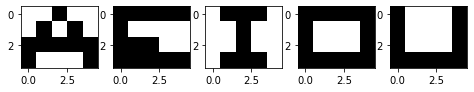

In [7]:
img=plt.figure(figsize=(8, 8))
for i in range(1,6):
    img.add_subplot(5, 5, i)
    plt.imshow(base[i-1]-1, cmap='Greys')

**Here we are getting the x and y coordinates to invert the pixel. Example we will get the original vowel A matrix and invert the pixel located at (2,1) to create a variation of A. Then we will repeat this process for (3,2) and so on.**

In [8]:
a_mod = np.array([[2,1],[3,2],[3,4],[4,4]])
e_mod = np.array([[2,2],[4,2],[5,3],[4,3]])
i_mod = np.array([[1,1],[4,2],[1,4],[4,3]])
o_mod = np.array([[2,2],[4,2],[2,3],[4,3]])
u_mod = np.array([[2,1],[4,1],[2,3],[4,3]])

In [9]:
mod = [a_mod,e_mod,i_mod,o_mod,u_mod]

In [10]:
a_mod[0]

array([2, 1])

In [11]:
def modify(base, mod):
    lst = []
    lst.append(base)
    for i in range(len(mod)):
        tmp = copy.deepcopy(base)
        tmp[mod[i][1]-1,mod[i][0]-1] *= -1
        lst.append(tmp)

    return lst

In [12]:
a_test = modify(base[0], mod[0])
e_test = modify(base[1], mod[1])
i_test = modify(base[2], mod[2])
o_test = modify(base[3], mod[3])
u_test = modify(base[4], mod[4])

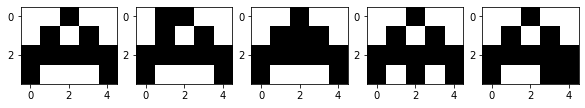

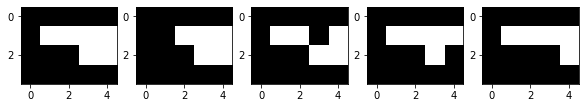

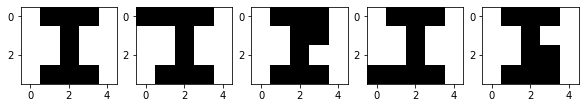

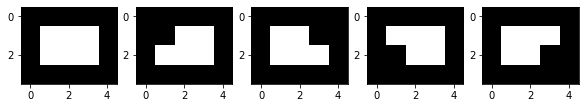

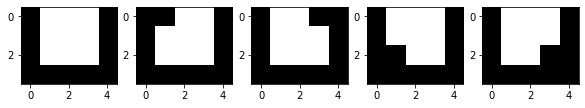

In [13]:
show(a_test)
show(e_test)
show(i_test)
show(o_test)
show(u_test)

**Above are the vowels and their 4 variations that we will use as the training set for our perceptron and adaline algorithm. Next we will be creating the test sets. In test set 1 we will still have the original vowels but now with a different 1 pixel variation.**

In [14]:
test_set = np.array([a_test,e_test,i_test,o_test,u_test])

In [15]:
tset_mod1 = np.array([[ [4,1],[5,3],[2,4],[1,2] ],  #tset1 a
                      [ [2,4],[5,2],[4,3],[1,3] ],  #tset1 e
                      [ [4,4],[2,4],[2,2],[3,4] ],  #tset1 i
                      [ [1,3],[3,2],[5,4],[3,3] ],  #tset1 o
                      [ [5,3],[3,4],[1,4],[5,4] ]]) #tset1 u

In [16]:
tset1_a = modify(base[0], tset_mod1[0])
tset1_e = modify(base[1], tset_mod1[1])
tset1_i = modify(base[2], tset_mod1[2])
tset1_o = modify(base[3], tset_mod1[3])
tset1_u = modify(base[4], tset_mod1[4])

In [17]:
base[0]

array([[-1, -1,  1, -1, -1],
       [-1,  1, -1,  1, -1],
       [ 1,  1,  1,  1,  1],
       [ 1, -1, -1, -1,  1]])

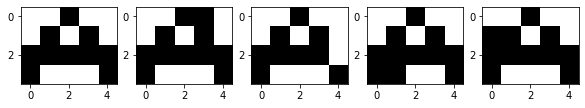

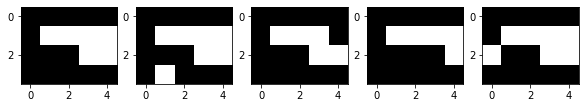

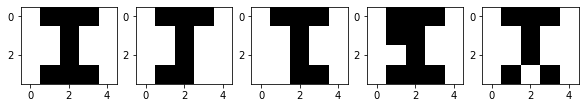

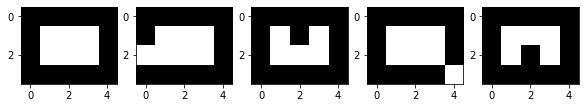

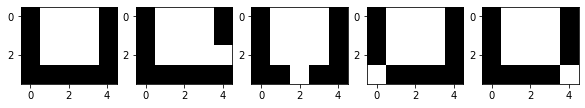

In [18]:
show(tset1_a)
show(tset1_e)
show(tset1_i)
show(tset1_o)
show(tset1_u)

In [19]:
tset1 = np.array([tset1_a,tset1_e,tset1_i,tset1_o,tset1_u])

**For test set 2 we will be grabbing the vowel variations from test set 1 and inverting 1 more pixel.**

In [20]:
tset_mod2 = np.array([[ [3,2],[1,3],[3,3],[2,1] ], #tset2 a
                      [ [3,2],[3,3],[5,4],[1,2] ], #tset2 e
                      [ [1,3],[2,2],[4,3],[1,4] ], #tset2 i
                      [ [4,3],[4,3],[5,1],[2,4] ], #tset2 o
                      [ [3,3],[2,2],[2,1],[1,3] ]])#tset2 u

In [21]:
tset_mod2[0]

array([[3, 2],
       [1, 3],
       [3, 3],
       [2, 1]])

In [22]:
def modify2(base,mod):
    lst = []
    lst.append(base[0])
    for i in range(1,5):
        tmp = copy.deepcopy(base[i])
        tmp[mod[i-1][1]-1,mod[i-1][0]-1] *= -1
        lst.append(tmp)
    return lst

In [23]:
tset2_a = modify2(tset1_a,tset_mod2[0])
tset2_e = modify2(tset1_e,tset_mod2[1])
tset2_i = modify2(tset1_i,tset_mod2[2])
tset2_o = modify2(tset1_o,tset_mod2[3])
tset2_u = modify2(tset1_u,tset_mod2[4])

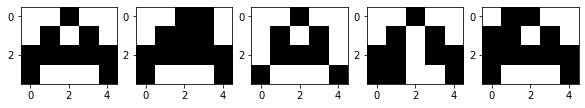

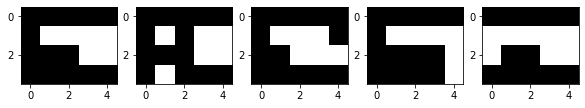

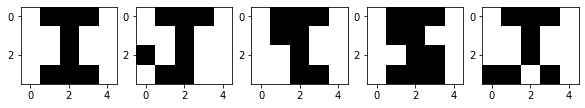

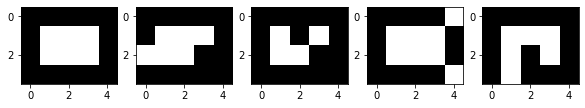

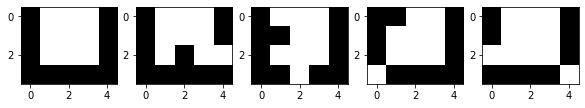

In [24]:
show(tset2_a)
show(tset2_e)
show(tset2_i)
show(tset2_o)
show(tset2_u)

In [25]:
tset2 = np.array([tset2_a,tset2_e,tset2_i,tset2_o,tset2_u])

**We will be using the same process to create test set 3 but using the variations of test set 2**

In [26]:
tset_mod3 = np.array([[ [5,2],[3,3],[1,3],[5,1] ], #tset3 a
                      [ [3,4],[1,4],[5,2],[1,3] ], #tset3 e
                      [ [1,1],[1,2],[2,4],[2,1] ], #tset3 i
                      [ [1,2],[4,2],[3,3],[1,4] ], #tset3 o
                      [ [3,2],[5,2],[5,4],[4,2] ]])#tset3 u

In [27]:
tset3_a = modify2(tset2_a,tset_mod3[0])
tset3_e = modify2(tset2_e,tset_mod3[1])
tset3_i = modify2(tset2_i,tset_mod3[2])
tset3_o = modify2(tset2_o,tset_mod3[3])
tset3_u = modify2(tset2_u,tset_mod3[4])

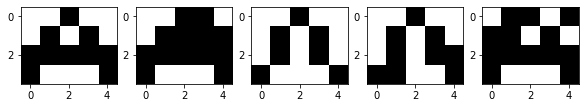

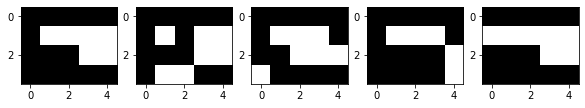

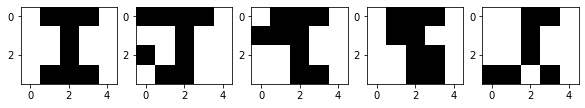

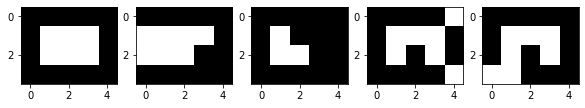

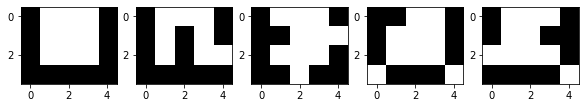

In [28]:
show(tset3_a)
show(tset3_e)
show(tset3_i)
show(tset3_o)
show(tset3_u)

In [29]:
tset3 = np.array([tset3_a,tset3_e,tset3_i,tset3_o,tset3_u])

## Perceptron
We will be implementing the Perceptron algorithm in the following section. A visual image is show on how the algorithm is implemented.

![alt text](Perceptron.png)

In [30]:
def step_func(x): # This is the step function or the activation function for the perceptron
    if x>=0:
        return 1
    return -1 

**In the following snippet of code we calculate $\sum_{i=1}^{n} x_i w_i$ by doing the dot product of the input (**x**) and the weights. Then we pass that dot product through the activation function to get a prediction of the image.**

In [31]:
def predict(inputs,w): 
    tmp = copy.deepcopy(inputs.ravel())
    tmp = np.append(tmp,1) #bias
    #print(tmp)
    #print(w)
    pred = step_func(np.dot(w,tmp.T)) # getting the sum of w and input and then applying the step function
    return pred

**In this function we update the weights by first getting the error and then updating it using the following equation:** <br>
<h1><center>$w(t+1) = w(t) + input * error$</center></h1>


In [32]:
def update_w(w,error,inputs):
    tmp = copy.deepcopy(inputs.ravel())
    tmp = np.append(tmp,1)
    new_w = w + (tmp*error)
    return new_w

In [33]:
def perceptron(x, y, epoch=10):
    w = np.zeros(len(x[0][0].ravel())+1,dtype=float) # Creates 21 weights of zero
    b = 1
    err = []
    acc = []
    for epo in range(epoch):
        t_error = 0
        for i in range(len(x[0])):
            for j in range(len(x[1])):
                pred = predict(x[i][j],w)
                error = (y[i][j] - pred)/2. # errors will be either -1 or 1
                t_error += np.absolute(error)
                #print(error)
                w = update_w(w,error,x[i][j]) 
                #print("new w {}", w)
                
        err.append(t_error)
        acc.append(1-t_error/25)
        print("epoch: ",epo, "acc: ", 1-t_error/25)
        
    return w,err,acc


### Perceptron "A" Detector
Now we will use the perceptron to train a model that classifies the vowel A or an image that looks like it to 1 and anything else will be classify as -1. We will also see how the model performed per epoch and how well it works with our test data set that we created in the beginning. 

The first five 1s in the t array will represent A from the data set. Meaning that when we pass the 25 data in the dataset, the first 5 will be A, the next 5 will be E, then the same patterns for I, O , U.

In [34]:
t = np.array([1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])
t = t.reshape(5,5)

In [35]:
w,err,acc = perceptron(test_set, t,epoch=10)

epoch:  0 acc:  0.96
epoch:  1 acc:  1.0
epoch:  2 acc:  1.0
epoch:  3 acc:  1.0
epoch:  4 acc:  1.0
epoch:  5 acc:  1.0
epoch:  6 acc:  1.0
epoch:  7 acc:  1.0
epoch:  8 acc:  1.0
epoch:  9 acc:  1.0


In [36]:
w

array([-1., -1., -1., -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        1.,  1., -1., -1., -1., -1., -1., -1.])

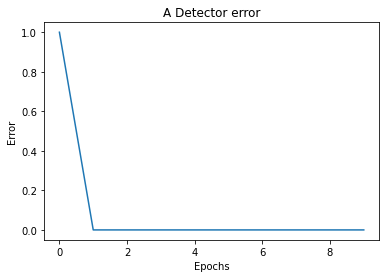

In [37]:
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.title("A Detector error")
plt.plot(err)
plt.show()

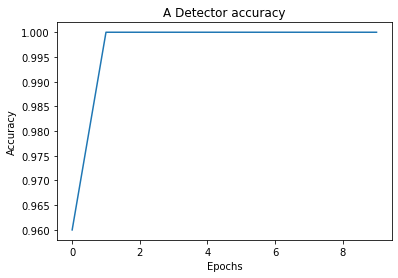

In [38]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("A Detector accuracy")
plt.plot(acc)
plt.show()

### Test sets

We can see that the model had no problem classifying test set 1 and labeled all of the test set correctly.

In [39]:
t_error1 = 0
p_lst = []
for i in range(len(tset1[0])):
    for j in range(len(tset1[1])):
        pred = predict(tset1[i][j],w)
        error = (t[i][j] - pred)/2. # errors will be either -1 or 1
        t_error1 += np.absolute(error)
        if error != 0:
            p_lst.append(tset1[i][j])
print("test set 1 errors: ", t_error1)
print("test set 1 accuracy: ", 1-t_error1/25)

test set 1 errors:  0.0
test set 1 accuracy:  1.0


For test set 2 we see that there is 1 error caught. We will keep track of which one it could not catch.

In [40]:
t_error2 = 0
p_lst = []
for i in range(len(tset2[0])):
    for j in range(len(tset2[1])):
        pred = predict(tset2[i][j],w)
        error = (t[i][j] - pred)/2. # errors will be either -1 or 1
        t_error2 += np.absolute(error)
        if error != 0:
            p_lst.append(tset2[i][j])
print("test set 2 errors: ", t_error2)
print("test set 2 accuracy: ", 1-t_error2/25)

test set 2 errors:  1.0
test set 2 accuracy:  0.96


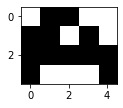

In [41]:
show(p_lst) # error images

Here we see that in test set 2 the model did not classify the 5th variation of A(pt205).

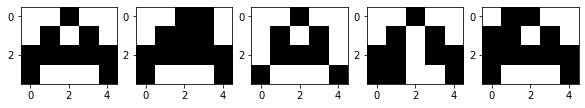

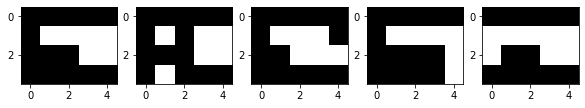

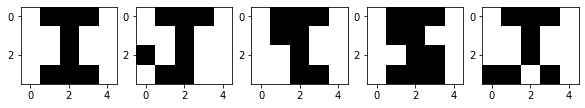

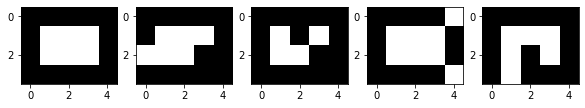

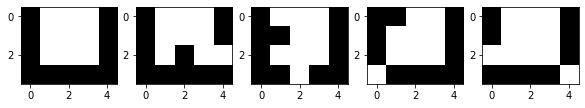

In [42]:
for i in range(5):
    show(tset2[i])

For test set 3 we see that there is 2 error caught.

In [43]:
t_error3 = 0
p_lst = []
for i in range(len(tset3[0])):
    for j in range(len(tset3[1])):
        pred = predict(tset3[i][j],w)
        error = (t[i][j] - pred)/2. # errors will be either -1 or 1
        t_error3 += np.absolute(error)
        if error != 0:
            p_lst.append(tset3[i][j])
print("test set 3 errors: ", t_error3)
print("test set 3 accuracy: ", 1-t_error3/25)

test set 3 errors:  2.0
test set 3 accuracy:  0.92


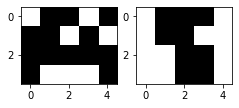

In [44]:
show(p_lst)

Here we see that in test set 3 the model did not classify the 5th variation of A(pt305) and the 4th variation of I(pt314).

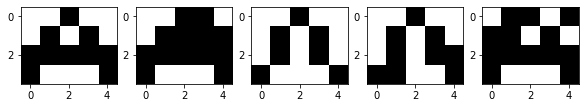

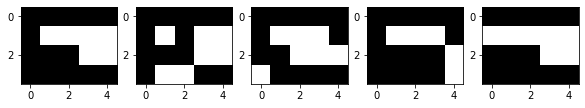

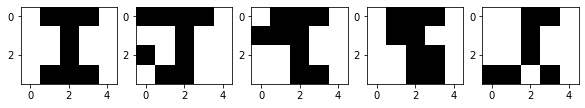

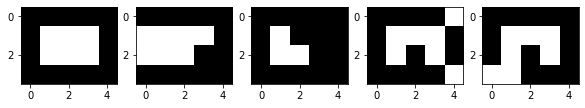

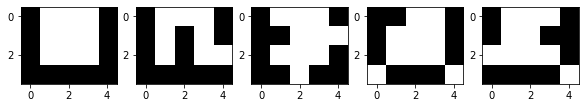

In [45]:
for i in range(5):
    show(tset3[i])

### Perceptron "E" Detector

Now we will create an E detector so in this case the 6th to 10th 1s in **t** will represent E.

In [46]:
t = np.array([-1,-1,-1,-1,-1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])
t = t.reshape(5,5)

In [47]:
w,err,acc = perceptron(test_set, t,epoch=10)

epoch:  0 acc:  0.88
epoch:  1 acc:  0.92
epoch:  2 acc:  0.88
epoch:  3 acc:  0.84
epoch:  4 acc:  0.92
epoch:  5 acc:  0.88
epoch:  6 acc:  1.0
epoch:  7 acc:  1.0
epoch:  8 acc:  1.0
epoch:  9 acc:  1.0


In [48]:
w

array([ 1.,  1., -3.,  3.,  7.,  7.,  1., -1.,  1., -3.,  1.,  3.,  3.,
        1., -5.,  1., -1., -1., -1.,  1., -7.])

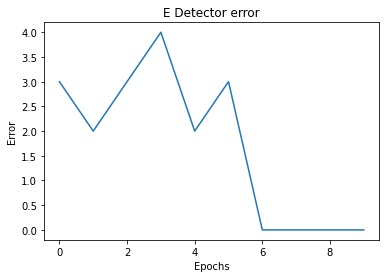

In [49]:
plt.xlabel("Epochs")
plt.ylabel("Error")
plt.plot(err)
plt.title("E Detector error")
plt.show()

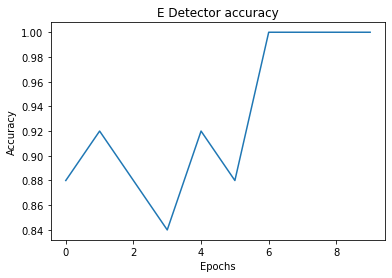

In [50]:
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot(acc)
plt.title("E Detector accuracy")
plt.show()

### Test sets

In [51]:
t_error1 = 0
p_lst = []
for i in range(len(tset1[0])):
    for j in range(len(tset1[1])):
        pred = predict(tset1[i][j],w)
        error = (t[i][j] - pred)/2. # errors will be either -1 or 1
        t_error1 += np.absolute(error)
        if error != 0:
            p_lst.append(tset1[i][j])
print("test set 1 errors: ", t_error1)
print("test set 1 accuracy: ", 1-t_error1/25)

test set 1 errors:  1.0
test set 1 accuracy:  0.96


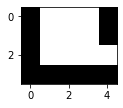

In [52]:
show(p_lst)

Here we see that in test set 1 the model did not classify the 2nd variation of U (pt122) correctly meaning it though that image was an E.

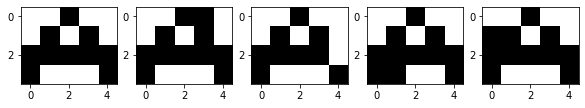

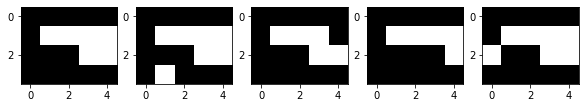

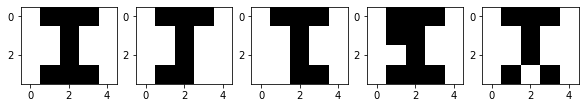

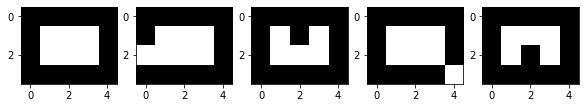

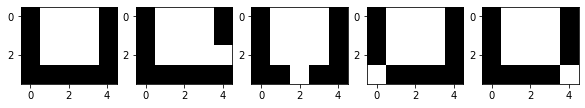

In [53]:
for i in range(5):
    show(tset1[i])

In [54]:
t_error2 = 0
p_lst = []
for i in range(len(tset2[0])):
    for j in range(len(tset2[1])):
        pred = predict(tset2[i][j],w)
        error = (t[i][j] - pred)/2. # errors will be either -1 or 1
        t_error2 += np.absolute(error)
        if error != 0:
            p_lst.append(tset2[i][j])
print("test set 2 errors: ", t_error2)
print("test set 2 accuracy: ", 1-t_error2/25)

test set 2 errors:  3.0
test set 2 accuracy:  0.88


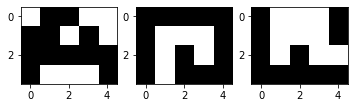

In [55]:
show(p_lst)

Misclassification
- 5th variation of A pt205
- 4th variation of O pt219
- 2nd variation of U pt222

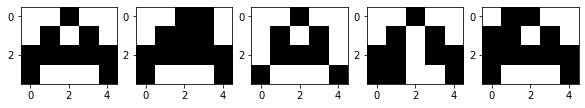

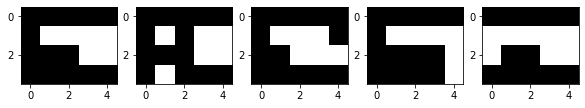

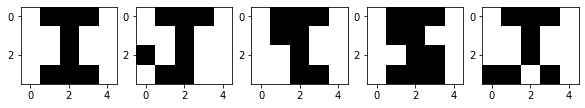

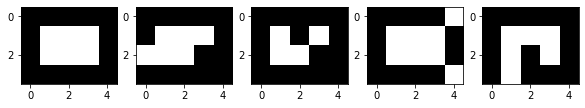

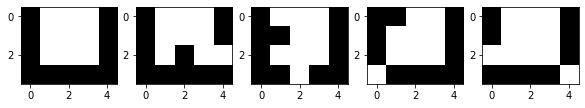

In [56]:
for i in range(5):
    show(tset2[i])

In [57]:
t_error3 = 0
p_lst = []
for i in range(len(tset3[0])):
    for j in range(len(tset3[1])):
        pred = predict(tset3[i][j],w)
        error = (t[i][j] - pred)/2. # errors will be either -1 or 1
        t_error3 += np.absolute(error)
        if error != 0:
            p_lst.append(tset3[i][j])
print("test set 3 errors: ", t_error3)
print("test set 3 accuracy: ", 1-t_error3/25)

test set 3 errors:  3.0
test set 3 accuracy:  0.88


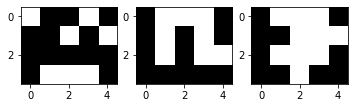

In [58]:
show(p_lst)

Misclassification
- 5th variation of A pt305
- 2th variation of U pt322
- 3nd variation of U pt323

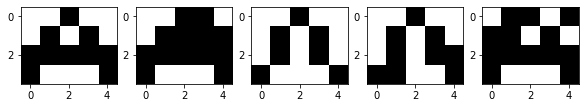

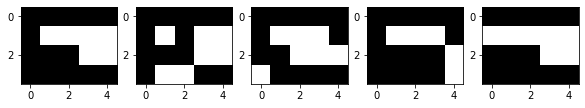

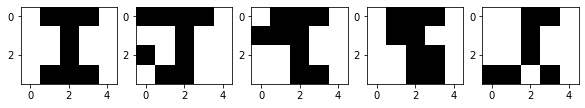

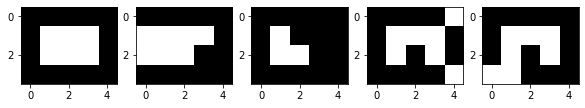

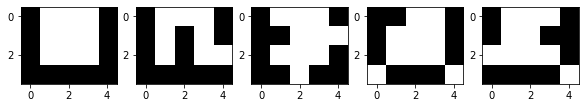

In [59]:
for i in range(5):
    show(tset3[i])

### Perceptron Conclusion

Through my algorithm the perceptron seems to have a harder time classifying correctly using the E Detector. Most of the error were with O or U variation. This is most likely due to the fact that in a 5 by 5 image the O and U might look similar in the training set to the machine.

## Adaline
We will be implementing the Adaline algorithm in the following section. A visual image is show on how the algorithm is implemented.

![alt text](adaline.png)

In [60]:
def hard_lim(Sum,thresh=0):
    if Sum>=thresh:
        return 1
    return -1 

In [61]:
def predict_Ada(inputs,w):
    tmp = copy.deepcopy(inputs.ravel())
    tmp = np.append(tmp,1) #bias
    #print(tmp)
    #print(w)
    pred = np.dot(w,tmp.T) # getting the sum of w and input and then applying the step function
    return pred

In [62]:
def update_w_ada(w,error,inputs,lr):
    tmp = copy.deepcopy(inputs.ravel())
    tmp = np.append(tmp,1)
    new_w = w + (tmp*error*lr)
    return new_w

In [63]:
def adaline(x, y, epoch=10, lr=0.1):
    w = np.zeros(len(x[0][0].ravel())+1,dtype=float) # Creates 21 weights of zero
    b = 1
    MSE = []
    for epo in range(epoch):
        MSE_epo=0
        for i in range(len(x[0])):
            for j in range(len(x[1])):
                pred = predict_Ada(x[i][j],w)
                err = (y[i][j] - pred)
                w = update_w_ada(w,err,x[i][j],lr)
                #print(w)
                MSE_epo += ((y[i][j] - pred)**2)
                #print(MSE_epo)
                
        
        MSE_epo = MSE_epo/len(y)      
        MSE.append(MSE_epo)
        print("epoch: ",epo, "MSE: ", MSE_epo)
        
    return w, MSE

### Perceptron "A" Detector

To observe more on how Adaline functions we will be changing the learning rate(lr) of the algorithm to see how it can change the Mean Square Error(MSE) over each epoch.

In [64]:
t = np.array([1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])
t = t.reshape(5,5)

In [65]:
w, MSE = adaline(test_set, t, lr=.1)

epoch:  0 MSE:  2.7726600151871827
epoch:  1 MSE:  3.155187150836673
epoch:  2 MSE:  5.803833995736818
epoch:  3 MSE:  13.780459536347758
epoch:  4 MSE:  23.769738813051035
epoch:  5 MSE:  57.45555234706084
epoch:  6 MSE:  130.05936871070622
epoch:  7 MSE:  302.4962017547473
epoch:  8 MSE:  539.923331790429
epoch:  9 MSE:  621.5168427092357


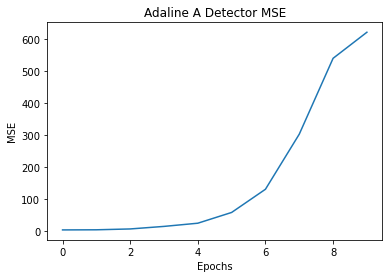

In [66]:
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(MSE)
plt.title("Adaline A Detector MSE")
plt.show()

**It seems like with a learning rate of 0.1 the Adaline model will never converge and actually diverges exponetially**

In [67]:
w, MSE = adaline(test_set, t, lr=.0001)

epoch:  0 MSE:  4.919333436291248
epoch:  1 MSE:  4.741639375824331
epoch:  2 MSE:  4.570845800479409
epoch:  3 MSE:  4.406676639842486
epoch:  4 MSE:  4.248867061731913
epoch:  5 MSE:  4.097163010036369
epoch:  6 MSE:  3.9513207616710657
epoch:  7 MSE:  3.811106501858654
epoch:  8 MSE:  3.6762959169742677
epoch:  9 MSE:  3.54667380422584


**With a learning rate of 0.0001 the Adaline model will converge eventually, I will increase the epoch to see if it converges.**

In [68]:
w, MSE = adaline(test_set, t, lr=.0001, epoch=50)

epoch:  0 MSE:  4.919333436291248
epoch:  1 MSE:  4.741639375824331
epoch:  2 MSE:  4.570845800479409
epoch:  3 MSE:  4.406676639842486
epoch:  4 MSE:  4.248867061731913
epoch:  5 MSE:  4.097163010036369
epoch:  6 MSE:  3.9513207616710657
epoch:  7 MSE:  3.811106501858654
epoch:  8 MSE:  3.6762959169742677
epoch:  9 MSE:  3.54667380422584
epoch:  10 MSE:  3.422033697471055
epoch:  11 MSE:  3.30217750850139
epoch:  12 MSE:  3.1869151831515543
epoch:  13 MSE:  3.076064371619277
epoch:  14 MSE:  2.9694501124059762
epoch:  15 MSE:  2.866904529313378
epoch:  16 MSE:  2.768266540954576
epoch:  17 MSE:  2.6733815822606037
epoch:  18 MSE:  2.5821013374851085
epoch:  19 MSE:  2.4942834842303965
epoch:  20 MSE:  2.4097914480379674
epoch:  21 MSE:  2.3284941671055988
epoch:  22 MSE:  2.250265866711266
epoch:  23 MSE:  2.1749858429416222
epoch:  24 MSE:  2.102538255339455
epoch:  25 MSE:  2.0328119281006005
epoch:  26 MSE:  1.9657001594660912
epoch:  27 MSE:  1.9011005389700895
epoch:  28 MSE:  1.

**It took about 50 epoch to converge to around 1. As we see it takes longer to converge from 2 to 1 than from 4 to 3. This indicates to me that from 1 to close to 0 might take alot longer**

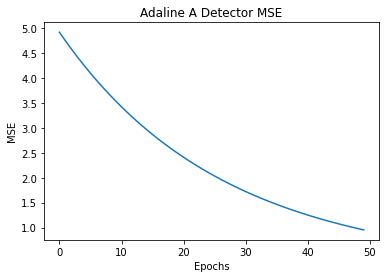

In [69]:
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(MSE)
plt.title("Adaline A Detector MSE")
plt.show()

In [70]:
w, MSE = adaline(test_set, t, lr=.01)

epoch:  0 MSE:  1.5459225731391515
epoch:  1 MSE:  0.18143179312850513
epoch:  2 MSE:  0.13988033863887475
epoch:  3 MSE:  0.11719217019984549
epoch:  4 MSE:  0.10294176893180715
epoch:  5 MSE:  0.09375567850883318
epoch:  6 MSE:  0.08744509610344633
epoch:  7 MSE:  0.08279281260314199
epoch:  8 MSE:  0.07913601110779159
epoch:  9 MSE:  0.07610806014205342


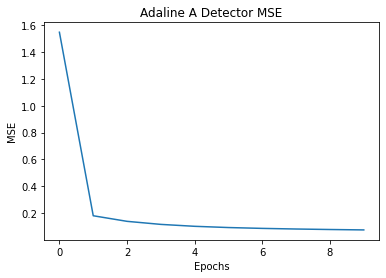

In [71]:
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(MSE)
plt.title("Adaline A Detector MSE")
plt.show()

**With a learning rate of 0.01 the Adaline converges very quickly and took only 2 epochs to have an MSE less than 1**

In [72]:
t_error1 = 0
p_lst = []
for i in range(len(tset1[0])):
    for j in range(len(tset1[1])):
        pred = hard_lim(predict_Ada(tset1[i][j],w))
        if pred!=t[i][j]:
            t_error1 +=1
            p_lst.append(tset1[i][j])
            
print("test set 2 errors: ", t_error1)
print("test set 2 accuracy: ", 1-t_error1/25)

test set 2 errors:  0
test set 2 accuracy:  1.0


In [73]:
t_error2 = 0
p_lst = []
for i in range(len(tset2[0])):
    for j in range(len(tset2[1])):
        pred = hard_lim(predict_Ada(tset2[i][j],w))
        if pred!=t[i][j]:
            t_error2 +=1
            p_lst.append(tset2[i][j])
            
print("test set 2 errors: ", t_error2)
print("test set 2 accuracy: ", 1-t_error2/25)

test set 2 errors:  0
test set 2 accuracy:  1.0


In [74]:
t_error3 = 0
p_lst = []
for i in range(len(tset3[0])):
    for j in range(len(tset3[1])):
        pred = hard_lim(predict_Ada(tset3[i][j],w))
        if pred!=t[i][j]:
            t_error3 +=1
            p_lst.append(tset3[i][j])
            
print("test set 2 errors: ", t_error3)
print("test set 2 accuracy: ", 1-t_error3/25)

test set 2 errors:  0
test set 2 accuracy:  1.0


**From the results observe from the test data sets there were no misclassification meaning that adaline performed better in general compare to the perceptron**

### Perceptron "E" Detector

In [75]:
t = np.array([-1,-1,-1,-1,-1,1,1,1,1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1])
t = t.reshape(5,5)

In [76]:
w, MSE = adaline(test_set, t, lr=.1)

epoch:  0 MSE:  5.884367455573768
epoch:  1 MSE:  8.501544263374196
epoch:  2 MSE:  9.640417085828911
epoch:  3 MSE:  25.650459350198567
epoch:  4 MSE:  11.183070666620065
epoch:  5 MSE:  60.95193068592897
epoch:  6 MSE:  108.66690814531417
epoch:  7 MSE:  148.27562131581152
epoch:  8 MSE:  266.59446033244694
epoch:  9 MSE:  606.4485132015477


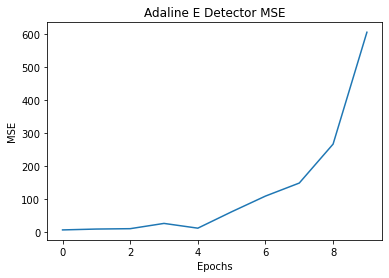

In [77]:
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(MSE)
plt.title("Adaline E Detector MSE")
plt.show()

In [78]:
w, MSE = adaline(test_set, t, lr=.0001)

epoch:  0 MSE:  4.991852331514243
epoch:  1 MSE:  4.955150363031657
epoch:  2 MSE:  4.918988226449324
epoch:  3 MSE:  4.883349898425096
epoch:  4 MSE:  4.8482199772904995
epoch:  5 MSE:  4.813583657524463
epoch:  6 MSE:  4.779426705287005
epoch:  7 MSE:  4.745735434968762
epoch:  8 MSE:  4.712496686714065
epoch:  9 MSE:  4.679697804877003


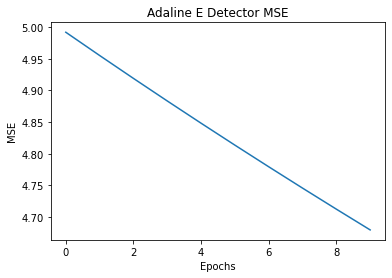

In [79]:
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(MSE)
plt.title("Adaline E Detector MSE")
plt.show()

In [80]:
w, MSE = adaline(test_set, t, lr=.01)

epoch:  0 MSE:  3.640203509704366
epoch:  1 MSE:  2.5888183018734536
epoch:  2 MSE:  1.597112904798421
epoch:  3 MSE:  1.0227774194125614
epoch:  4 MSE:  0.7123971889759368
epoch:  5 MSE:  0.5431558869863933
epoch:  6 MSE:  0.4479298365456133
epoch:  7 MSE:  0.39157828557285845
epoch:  8 MSE:  0.35581630470727355
epoch:  9 MSE:  0.33112594701943293


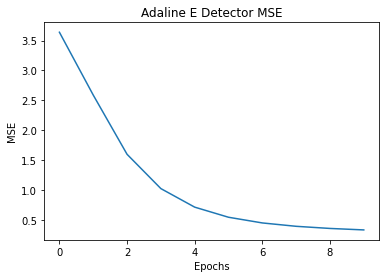

In [81]:
plt.xlabel("Epochs")
plt.ylabel("MSE")
plt.plot(MSE)
plt.title("Adaline E Detector MSE")
plt.show()

**From the observation of making an E detector the learning rate seems to behave about the same as the A detector**

In [82]:
t_error1 = 0
p_lst = []
for i in range(len(tset1[0])):
    for j in range(len(tset1[1])):
        pred = hard_lim(predict_Ada(tset1[i][j],w))
        if pred!=t[i][j]:
            t_error1 +=1
            p_lst.append(tset1[i][j])
            
print("test set 2 errors: ", t_error1)
print("test set 2 accuracy: ", 1-t_error1/25)

test set 2 errors:  0
test set 2 accuracy:  1.0


In [83]:
t_error2 = 0
p_lst = []
for i in range(len(tset2[0])):
    for j in range(len(tset2[1])):
        pred = hard_lim(predict_Ada(tset2[i][j],w))
        if pred!=t[i][j]:
            t_error2 +=1
            p_lst.append(tset2[i][j])
            
print("test set 2 errors: ", t_error2)
print("test set 2 accuracy: ", 1-t_error2/25)

test set 2 errors:  0
test set 2 accuracy:  1.0


In [84]:
t_error3 = 0
p_lst = []
for i in range(len(tset3[0])):
    for j in range(len(tset3[1])):
        pred = hard_lim(predict_Ada(tset3[i][j],w))
        if pred!=t[i][j]:
            t_error3 +=1
            p_lst.append(tset3[i][j])
            
print("test set 2 errors: ", t_error3)
print("test set 2 accuracy: ", 1-t_error3/25)

test set 2 errors:  1
test set 2 accuracy:  0.96


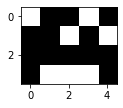

In [85]:
show(p_lst)

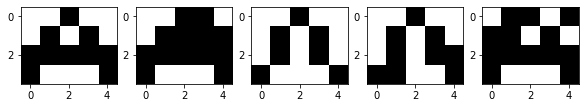

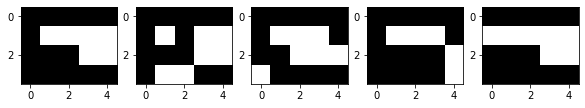

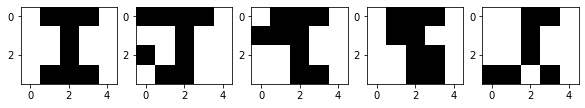

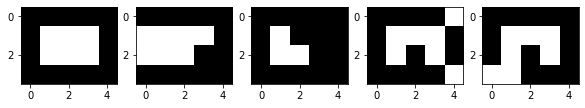

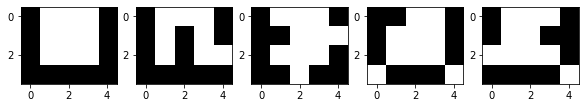

In [86]:
for i in range(5):
    show(tset3[i])

**When using Adaline there was one error caught even though the E detector had a lower MSE than the A detector**

### Adaline Conclusion

Evidently trough the result the Adeline mode works better than the Perceptron in this application. Seeing as by using the learning rate and changing the weights a little at a time shows that eventually the Adaline model will produce better result than the Perceptron since the Perceptron is using the class labels to change its weight so is more straightforward.

## Final Conclusion

Through this lab we were able to explore the algorithm behind the Perceptron and Adaline Neural Network algorithm. With the Vowel dataset that we created we had first-hand examples on how the Adaline may be better than the Perceptron in this types of applications. Mostly due to the fact Adaline changes the weight differently, it does it by trying to figure the optimal weights to decrease the MSE value through a process called Gradient Descent.

But this is only a single layer neural network which can do pretty basic stuff but once classifying more complex dataset I strongly believe that we will have to move on the multi-layer neural network that will be for future projects.